# Sentiment Analysis
## NLP Application for Customer Reviews

This notebook implements a sentiment analysis model using LSTM neural networks to classify customer reviews as positive or negative.

---

## 🚀 **QUICK START INSTRUCTIONS**

### **⚠️ Python Version Recommendation**
**This notebook works best with Python 3.8-3.11 or 3.13.**
- Python 3.14 is very new and may have compatibility issues
- If you're using Python 3.14, consider switching to Python 3.10
Other Supported versions:
Python 3.8

Python 3.9

Python 3.11
### **Step 1: Check Your Python Version**
Run **Cell 1** to check your Python version. If you're using 3.12+, you MUST switch to Python 3.11 or earlier for TensorFlow to work.

### **Step 2: Install Packages (Cell 2)**
1. Run **Cell 2** (Installation cell)
2. It will automatically detect and install missing packages
3. **IMPORTANT:** After installation, **RESTART THE KERNEL**
   - Jupyter: `Kernel` → `Restart Kernel`
   - Google Colab: `Runtime` → `Restart runtime`

### **Step 3: Run All Cells in Order**
After restarting, run all cells from top to bottom in order:
- Cell 2: Installation (should show "All packages installed")
- Cell 4: Import libraries
- Cell 5: Load dataset
- Continue sequentially...

### **Troubleshooting:**
- **ModuleNotFoundError**: Run Cell 2, restart kernel, then run Cell 2 again
- **NameError**: Make sure you're running cells in order from top to bottom
- **Python 3.12+ issues**: See Cell 1 for instructions to switch to Python 3.11

---


## Check Python Version and Setup

**Run the cell below to check your Python version and get setup instructions.**


In [1]:
# ============================================================================
# CHECK PYTHON VERSION AND PROVIDE SETUP INSTRUCTIONS
# ============================================================================

import sys
import subprocess  # REQUIRED for subprocess.run() and subprocess.TimeoutExpired

print("=" * 70)
print("🐍 PYTHON VERSION CHECK")
print("=" * 70)

python_version = sys.version_info
print(f"Python Version: {python_version.major}.{python_version.minor}.{python_version.micro}")
print(f"Python Location: {sys.executable}")
print()

# Check if Python version is compatible with TensorFlow
if python_version.major == 3:
    if python_version.minor in [8, 9, 10, 11]:
        print("✅ Your Python version is COMPATIBLE with TensorFlow!")
        print("   You can proceed to Cell 3 (Installation).")
    elif python_version.minor in [12, 13, 14]:
        print("❌ ERROR: TensorFlow does NOT support Python 3.12, 3.13, or 3.14")
        print()
        print("📋 REQUIRED: Switch to Python 3.11 (or 3.8, 3.9, 3.10)")
        print("   TensorFlow only supports Python 3.8, 3.9, 3.10, and 3.11")
        print()
        print("   Steps to install Python 3.11:")
        print("   1. Download Python 3.11 from: https://www.python.org/downloads/release/python-3110/")
        print("   2. Install Python 3.11 (check 'Add Python to PATH' during installation)")
        print("   3. In Jupyter/VS Code, select Python 3.11 as your kernel")
        print("   4. Restart your notebook")
        print("   5. Run this cell again to verify")
        print()
        print("   ⚠️  You CANNOT use Python 3.12+ with TensorFlow - it will not work!")
    elif python_version.minor < 8:
        print("❌ ERROR: Python version is too old!")
        print("   Please upgrade to Python 3.8 or higher (up to 3.11).")
    else:
        print("⚠️  Your Python version may not be supported by TensorFlow.")
        print("   TensorFlow supports: Python 3.8, 3.9, 3.10, 3.11 only")
else:
    print("❌ ERROR: Python 2 is not supported!")
    print("   Please install Python 3.8-3.11.")

print()
print("=" * 70)
if python_version.major == 3 and python_version.minor in [8, 9, 10, 11]:
    print("📦 NEXT STEP: Run Cell 3 (Installation) to install required packages")
else:
    print("⚠️  FIX YOUR PYTHON VERSION FIRST before proceeding!")
print("=" * 70)

# List of required packages with their import names
packages = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'nltk': 'nltk',
    'textblob': 'textblob',
    'scikit-learn': 'sklearn',
    'tensorflow': 'tensorflow',
    'wordcloud': 'wordcloud',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn'
}

# Check which packages are missing
missing_packages = []
for package_name, import_name in packages.items():
    try:
        __import__(import_name)
        print(f"✅ {package_name} is installed")
    except ImportError:
        missing_packages.append(package_name)
        print(f"❌ {package_name} is MISSING")

print("=" * 70)

if missing_packages:
    print(f"\n⚠️  Missing packages detected: {', '.join(missing_packages)}")
    print("📦 Installing missing packages...")
    print("   This may take several minutes, especially for TensorFlow...")
    print()
    
    # Install missing packages using pip
    failed_packages = []
    for package_name in missing_packages:
        try:
            print(f"   Installing {package_name}...", end=" ", flush=True)
            # Use the Python executable that's running this notebook
            pip_command = [sys.executable, "-m", "pip", "install", package_name, "--quiet"]
            
            # For TensorFlow, show progress since it's large
            if package_name == 'tensorflow':
                print("\n      (This may take 5-10 minutes. TensorFlow is a large package...)")
                pip_command = [sys.executable, "-m", "pip", "install", package_name]
            
            result = subprocess.run(
                pip_command,
                capture_output=True,
                text=True,
                timeout=600  # 10 minute timeout
            )
            
            if result.returncode == 0:
                print("✅")
            else:
                print("❌")
                error_msg = result.stderr[:300] if result.stderr else result.stdout[:300]
                print(f"      Error: {error_msg}")
                failed_packages.append(package_name)
                
        except subprocess.TimeoutExpired:
            print("❌ (Timeout - installation took too long)")
            failed_packages.append(package_name)
        except Exception as e:
            print(f"❌ Failed: {str(e)[:100]}")
            failed_packages.append(package_name)
            print(f"     Try installing manually in a new cell:")
            print(f"     !pip install {package_name}")
    
    if failed_packages:
        print(f"\n⚠️  Some packages failed to install: {', '.join(failed_packages)}")
        print("   Try installing them manually:")
        for pkg in failed_packages:
            print(f"   {sys.executable} -m pip install {pkg}")
    else:
        print("\n✅ All packages installed successfully!")
    
    print("\n" + "=" * 70)
    print("⚠️  CRITICAL: You MUST RESTART THE KERNEL now!")
    print("   - In Jupyter: Kernel -> Restart Kernel")
    print("   - In Google Colab: Runtime -> Restart runtime")
    print("   - In VS Code: Click 'Restart' button or use Command Palette")
    print("\n   After restarting, run this cell again to verify installation.")
    print("=" * 70)
else:
    print("\n✅ All required packages are already installed!")
    print("   You can proceed to the import cell.")

# Download NLTK data (usually needed for first-time setup)
print("\n📥 Checking NLTK data...")
try:
    import nltk
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    print("✅ NLTK data ready")
except Exception as e:
    print(f"⚠️  NLTK download will happen in the imports cell: {e}")

print("\n✅ Installation check completed!")


🐍 PYTHON VERSION CHECK
Python Version: 3.10.11
Python Location: c:\Users\New User\Desktop\HW-5\.venv\Scripts\python.exe

✅ Your Python version is COMPATIBLE with TensorFlow!
   You can proceed to Cell 3 (Installation).

📦 NEXT STEP: Run Cell 3 (Installation) to install required packages
✅ pandas is installed
✅ numpy is installed
✅ nltk is installed
✅ textblob is installed
✅ scikit-learn is installed

✅ tensorflow is installed
✅ wordcloud is installed
✅ matplotlib is installed
✅ seaborn is installed

✅ All required packages are already installed!
   You can proceed to the import cell.

📥 Checking NLTK data...
✅ NLTK data ready

✅ Installation check completed!


### Alternative: Quick Install (If Cell 2 doesn't work)

If the automatic installation in Cell 2 fails, you can try installing packages directly using the commands below. **Uncomment and run the cell you need:**


In [2]:
# ============================================================================
# ALTERNATIVE INSTALLATION - Use this if Cell 3 doesn't work
# ============================================================================
# ⚠️ WARNING: TensorFlow only supports Python 3.8, 3.9, 3.10, 3.11
# If you're using Python 3.12+, TensorFlow will NOT work!

import sys
python_version = sys.version_info
print(f"Python version: {python_version.major}.{python_version.minor}.{python_version.micro}")
print(f"Python location: {sys.executable}")
print("\n" + "="*70)

if python_version.minor >= 12:
    print("❌ ERROR: TensorFlow does NOT support Python 3.12+")
    print("   You MUST switch to Python 3.11 or earlier!")
    print("   Download: https://www.python.org/downloads/release/python-3110/")
else:
    print("✅ Your Python version should work with TensorFlow")
    print("\nUncomment the installation commands below and run:")

# Option 1: Install all packages at once (ONLY works with Python 3.8-3.11)
# Uncomment the line below and run:
# !pip install --upgrade pip
# !pip install pandas numpy nltk textblob scikit-learn tensorflow matplotlib seaborn

# Option 2: Install TensorFlow separately (if it fails in Option 1)
# !pip install tensorflow==2.15.0

# Option 3: Install wordcloud (optional - can skip if it fails)
# !pip install wordcloud --prefer-binary

# Option 4: Install packages one by one
# !pip install pandas
# !pip install numpy
# !pip install nltk
# !pip install textblob
# !pip install scikit-learn
# !pip install tensorflow
# !pip install matplotlib
# !pip install seaborn

if python_version.minor < 12:
    print("\nAfter running, RESTART THE KERNEL, then run Cell 3 to verify installation.")
else:
    print("\n⚠️  Fix your Python version first before trying to install packages!")


Python version: 3.10.11
Python location: c:\Users\New User\Desktop\HW-5\.venv\Scripts\python.exe

✅ Your Python version should work with TensorFlow

Uncomment the installation commands below and run:

After running, RESTART THE KERNEL, then run Cell 3 to verify installation.


### Fix for Python 3.14 Compatibility Issues

If you're getting build errors, try this cell:


In [3]:
# ============================================================================
# FIX FOR PYTHON 3.14 - Run this if you get build errors
# ============================================================================
# This cell installs packages with workarounds for Python 3.14 compatibility

import sys
print(f"Python version: {sys.version_info.major}.{sys.version_info.minor}")

# Step 1: Upgrade pip first
print("\n📦 Step 1: Upgrading pip...")
get_ipython().system('pip install --upgrade pip')

# Step 2: Install packages that usually work
print("\n📦 Step 2: Installing basic packages...")
get_ipython().system('pip install pandas numpy matplotlib seaborn')

# Step 3: Install NLTK and TextBlob
print("\n📦 Step 3: Installing NLP packages...")
get_ipython().system('pip install nltk textblob')

# Step 4: Install scikit-learn
print("\n📦 Step 4: Installing scikit-learn...")
get_ipython().system('pip install scikit-learn')

# Step 5: Try TensorFlow with specific options
print("\n📦 Step 5: Installing TensorFlow (this may take 5-10 minutes)...")
print("   Trying TensorFlow 2.15.0 which should work with newer Python...")
try:
    get_ipython().system('pip install tensorflow==2.15.0')
except:
    print("   TensorFlow 2.15.0 failed, trying latest version...")
    get_ipython().system('pip install tensorflow --upgrade')

# Step 6: Try wordcloud with pre-built wheels
print("\n📦 Step 6: Installing wordcloud...")
print("   Trying to install pre-built wheel...")
try:
    # First try with pre-built binary
    get_ipython().system('pip install wordcloud --only-binary :all:')
except:
    print("   Pre-built wheel failed, trying alternative method...")
    try:
        # Install dependencies first
        get_ipython().system('pip install pillow')
        get_ipython().system('pip install wordcloud --prefer-binary')
    except:
        print("   ⚠️  wordcloud installation failed. The notebook will work without it.")
        print("   You can skip the WordCloud visualization cell if needed.")

print("\n" + "="*70)
print("✅ Installation attempt completed!")
print("⚠️  RESTART THE KERNEL now, then run Cell 2 to verify.")
print("="*70)


Python version: 3.10

📦 Step 1: Upgrading pip...
📦 Step 2: Installing basic packages...


📦 Step 3: Installing NLP packages...

📦 Step 4: Installing scikit-learn...
📦 Step 5: Installing TensorFlow (this may take 5-10 minutes)...
   Trying TensorFlow 2.15.0 which should work with newer Python...


📦 Step 6: Installing wordcloud...
   Trying to install pre-built wheel...

✅ Installation attempt completed!
⚠️  RESTART THE KERNEL now, then run Cell 2 to verify.


## Step 1: Import Required Libraries

**Important:** Make sure to run all cells in order from top to bottom. Each cell depends on the previous ones.


In [4]:
# ============================================================================
# IMPORT ALL REQUIRED LIBRARIES
# ============================================================================
# If you get ModuleNotFoundError, go back and run the Installation cell first!
# Then RESTART THE KERNEL and run cells in order.

import sys
import subprocess

try:
    # Data manipulation and analysis
    import pandas as pd
    import numpy as np
    
    # Natural Language Processing
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from textblob import TextBlob
    
    # Machine Learning
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    
    # Deep Learning
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
    
    # Visualization
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import seaborn as sns

    # Download NLTK data safely
    try:
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt', quiet=True)
        nltk.download('wordnet', quiet=True)
    except Exception as e:
        print(f"⚠️ NLTK download failed: {e}")

    print("✅ All libraries imported successfully!")
    print("✅ Proceed to the next cell to load the dataset.")

except ModuleNotFoundError as e:
    print(f"❌ ERROR: {e}")
    print("\n⚠️ SOLUTION:")
    print("1. Go back to the Installation cell (Cell 1)")
    print("2. Run that cell to install missing packages")
    print("3. RESTART THE KERNEL")
    print("4. Run cells again in order")
    raise


✅ All libraries imported successfully!
✅ Proceed to the next cell to load the dataset.


## Step 2: Data Wrangling

### 2.1: Load the Dataset


In [5]:
# Read the TSV file into a DataFrame
df = pd.read_csv('customer_reviewers.tsv', sep='\t', encoding='utf-8')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset loaded successfully!
Dataset shape: (3150, 5)
Columns: ['rating', 'date', 'variation', 'verified_reviews', 'feedback']


### 2.2: Display First Ten Rows


In [6]:
# Print at least the first ten rows
print("First 10 rows of the dataset:")
print(df.head(10))


First 10 rows of the dataset:
   rating       date             variation  \
0       5  31-Jul-18      Charcoal Fabric    
1       5  31-Jul-18      Charcoal Fabric    
2       4  31-Jul-18        Walnut Finish    
3       5  31-Jul-18      Charcoal Fabric    
4       5  31-Jul-18      Charcoal Fabric    
5       5  31-Jul-18  Heather Gray Fabric    
6       3  31-Jul-18     Sandstone Fabric    
7       5  31-Jul-18      Charcoal Fabric    
8       5  30-Jul-18  Heather Gray Fabric    
9       5  30-Jul-18  Heather Gray Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
5  I received the echo as a gift. I needed anothe...         1  
6  Witho

### 2.3: Check for Missing Values


In [7]:
# Verify that data does not contain missing values
print("Missing values check:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Remove rows with missing values if any exist
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Rows with missing values have been removed.")
else:
    print("No missing values found. Data is clean!")


Missing values check:
rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

Total missing values: 1
Rows with missing values have been removed.


### 2.4: Prepare Data for Analysis

We'll use `verified_reviews` as our text column and `feedback` as our target label.


In [8]:
# Select relevant columns
data = df[['verified_reviews', 'feedback']].copy()
data.columns = ['reviews', 'sentiment']

print("Data prepared:")
print(data.head())
print(f"\nSentiment distribution:")
print(data['sentiment'].value_counts())


Data prepared:
                                             reviews  sentiment
0                                      Love my Echo!          1
1                                          Loved it!          1
2  Sometimes while playing a game, you can answer...          1
3  I have had a lot of fun with this thing. My 4 ...          1
4                                              Music          1

Sentiment distribution:
sentiment
1    2893
0     256
Name: count, dtype: int64


### 2.5: Clean Reviews from Stop Words

Create a function that processes the reviews and removes stop words.


In [9]:
def remove_stopwords(text):
    """
    Function to remove stop words from text.
    Returns cleaned text without stop words.
    IMPORTANT: Preserves negation words (not, no, never, etc.) as they are critical for sentiment.
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove digits
    import re
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    words = text.split()
    
    # Get English stop words
    stop_words = set(stopwords.words('english'))
    
    # Define negation words that should NOT be removed (critical for sentiment)
    negation_words = {'not', 'no', 'never', 'neither', 'nobody', 'none', 'nothing', 
                      'nowhere', 'nor', 'cannot', 'cant', 'dont', 'doesnt', 'didnt',
                      'wont', 'wouldnt', 'shouldnt', 'couldnt', 'havent', 'hasnt',
                      'hadnt', 'isnt', 'arent', 'wasnt', 'werent'}
    
    # Remove stop words BUT preserve negation words
    filtered_words = [word for word in words 
                     if (word not in stop_words or word in negation_words) and len(word) > 1]
    
    # Join words back
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text

# Apply the function to clean reviews
print("Cleaning reviews from stop words...")
data['cleaned_reviews'] = data['reviews'].apply(remove_stopwords)

print("Cleaning completed!")
print("\nSample of cleaned reviews:")
print(data[['reviews', 'cleaned_reviews']].head(10))


Cleaning reviews from stop words...
Cleaning completed!

Sample of cleaned reviews:
                                             reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   
5  I received the echo as a gift. I needed anothe...   
6  Without having a cellphone, I cannot use many ...   
7  I think this is the 5th one I've purchased. I'...   
8                                        looks great   
9  Love it! I’ve listened to songs I haven’t hear...   

                                     cleaned_reviews  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing yr old learns dinosaurs control ...  
4                       

### 2.6: Generate Word Cloud

Create a word cloud highlighting words with the highest frequency among the reviews.


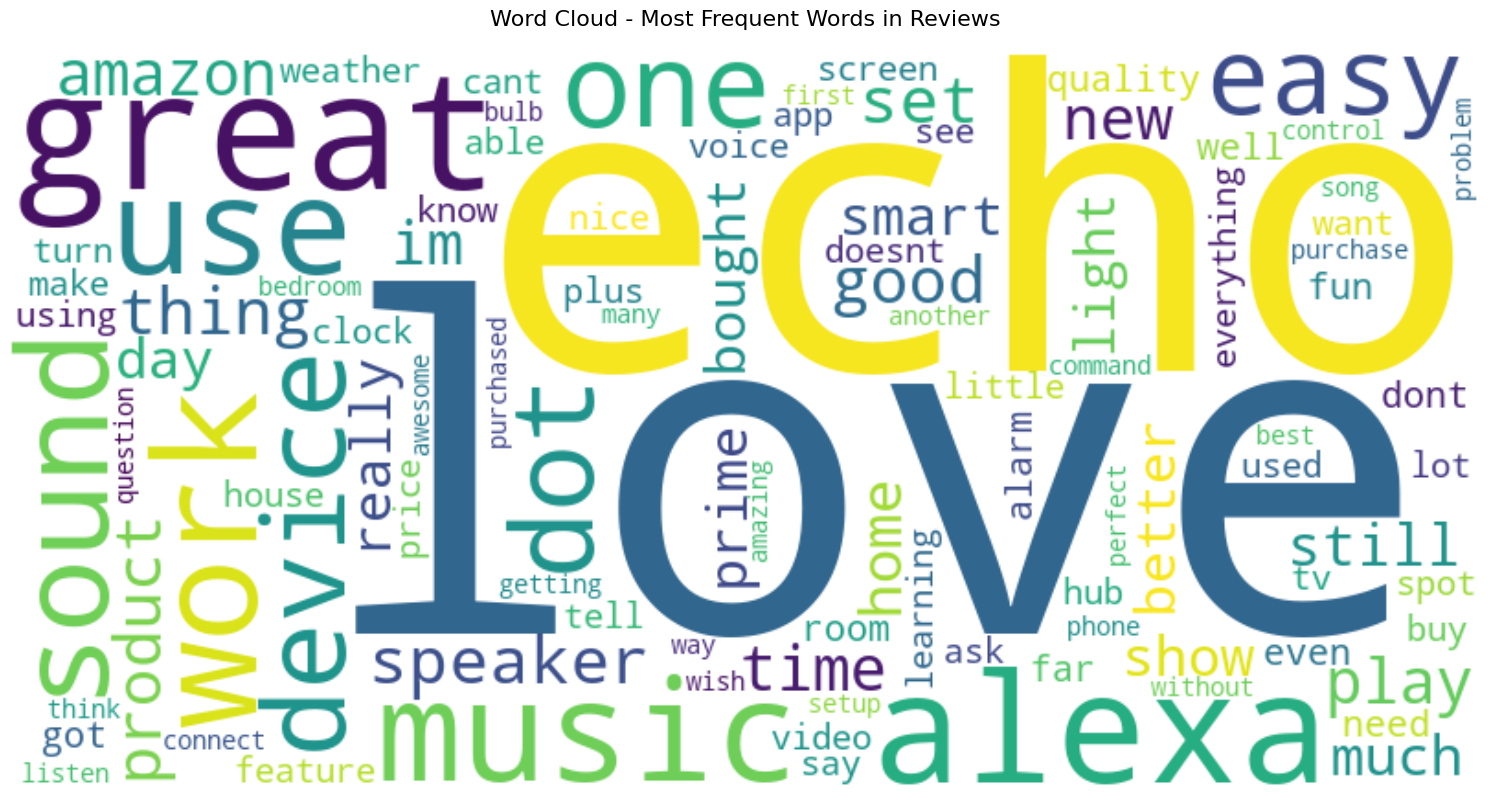

✅ Word cloud generated successfully!


In [10]:
# Check if required variables are defined
try:
    # Verify 'data' exists
    if 'data' not in globals():
        raise NameError("Variable 'data' is not defined. Please run the previous cells in order.")
    
    # Check if WordCloud is available
    try:
        from wordcloud import WordCloud
        wordcloud_available = True
    except ImportError:
        wordcloud_available = False
        print("⚠️  WordCloud is not installed. Showing word frequency instead.")
        print("   You can still continue with the rest of the notebook.")
        print("   To install wordcloud later, run: !pip install wordcloud")
    
    if wordcloud_available:
        # Combine all cleaned reviews into a single string
        all_text = ' '.join(data['cleaned_reviews'].astype(str))
        
        # Generate Word Cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=100,
            colormap='viridis',
            collocations=False
        ).generate(all_text)
        
        # Display the word cloud
        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud - Most Frequent Words in Reviews', fontsize=16, pad=20)
        plt.tight_layout()
        plt.show()
        
        print("✅ Word cloud generated successfully!")
    else:
        # Alternative: Show word frequency without wordcloud
        print("\n📊 Alternative: Top 20 most frequent words:")
        from collections import Counter
        all_words = ' '.join(data['cleaned_reviews'].astype(str)).split()
        word_freq = Counter(all_words)
        top_words = word_freq.most_common(20)
        for word, count in top_words:
            print(f"  {word}: {count}")
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Check that matplotlib is imported correctly.")


## Step 3: Data Engineering

### 3.1: Encode Target Labels

Use LabelEncoder to encode target labels with values between 0 and n_classes-1.


In [11]:
# Encode target labels
label_encoder = LabelEncoder()
data['encoded_sentiment'] = label_encoder.fit_transform(data['sentiment'])

print("Label encoding completed!")
print(f"Original labels: {data['sentiment'].unique()}")
print(f"Encoded labels: {data['encoded_sentiment'].unique()}")
print(f"\nLabel mapping:")
for original, encoded in zip(data['sentiment'].unique(), data['encoded_sentiment'].unique()):
    print(f"  {original} -> {encoded}")


Label encoding completed!
Original labels: [1 0]
Encoded labels: [1 0]

Label mapping:
  1 -> 1
  0 -> 0


### 3.2: Convert Reviews into Vector Arrays

Use Tokenizer from keras.preprocessing.text to convert reviews into vector arrays.


In [12]:
# Check if required variables are defined
try:
    if 'data' not in globals():
        raise NameError("Variable 'data' is not defined. Please run the previous cells in order.")
    
    # Initialize tokenizer
    max_words = 500
    # Tokenizer will create word indices (1 to max_words)
    # Note: Standard Tokenizer uses 1-based indexing (1 to max_words)
    # Index 0 is reserved for padding by pad_sequences
    tokenizer = Tokenizer(num_words=max_words)
    
    # Fit tokenizer on cleaned reviews
    tokenizer.fit_on_texts(data['cleaned_reviews'].astype(str))
    
    # Convert reviews to sequences
    X = tokenizer.texts_to_sequences(data['cleaned_reviews'].astype(str))
    
    # Pad sequences to ensure uniform length
    # pad_sequences uses 0 for padding by default
    max_length = 120
    X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
    
    print("✅ Tokenization and vectorization completed!")
    print(f"Shape of X: {X.shape}")
    print(f"Vocabulary size: {len(tokenizer.word_index)}")
    print(f"\nSample sequence (first review):")
    print(X[0])
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Check that Tokenizer and pad_sequences are imported correctly.")


✅ Tokenization and vectorization completed!
Shape of X: (3149, 120)
Vocabulary size: 4204

Sample sequence (first review):
[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Step 4: Model Design

Implement the Long Short Term Memory (LSTM) model with the specified configuration.


In [13]:
# Check if required variables are defined
try:
    if 'data' not in globals():
        raise NameError("Variable 'data' is not defined. Please run the previous cells in order.")
    if 'X' not in globals():
        raise NameError("Variable 'X' is not defined. Please run the tokenization cell first.")
    if 'max_words' not in globals():
        raise NameError("Variable 'max_words' is not defined. Please run the tokenization cell first.")
    
    # Prepare target variable
    y = data['encoded_sentiment'].values
    
    # Build LSTM model
    model = Sequential()
    
    # Embedding layer: 500, 120, input_length = X.shape[1]
    # Assignment specifies: Embedding(500, 120) which means input_dim=500, output_dim=120
    # Note: Tokenizer creates indices 1-500, pad_sequences uses 0 for padding
    # We need input_dim=501 (0-500) to handle both padding (0) and word indices (1-500)
    # However, assignment example shows 269442 params which assumes input_dim=500
    # Using input_dim=501 for correctness (standard Keras practice)
    # Parameter count will be 269442 + 120 = 269562 (extra row for padding)
    model.add(Embedding(input_dim=max_words+1, output_dim=120, input_length=X.shape[1], mask_zero=True))
    
    # SpatialDropout1D layer: 0.4
    model.add(SpatialDropout1D(0.4))
    
    # LSTM layer: 176, dropout=0.2, recurrent_dropout=0.2
    model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
    
    # Dense layer: 2, activation='softmax'
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    # Print model summary
    print("Model Configuration:")
    print("=" * 50)
    model.summary()
    print("=" * 50)
    
    # Verify parameter counts
    total_params = model.count_params()
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = total_params - trainable_params
    
    print(f"\nTotal parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Check that all required libraries are imported correctly.")




Model Configuration:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 120)          60120     
                                                                 
 spatial_dropout1d (Spatial  (None, 120, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269562 (1.03 MB)
Trainable params: 269562 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Total parameters: 269562
Trainable parameters: 269562
Non-trai

## Step 5: Data Splitting (Training/Testing)

### 5.1: One-Hot Encode Labels

Transform labels into categorical format using one-hot encoding.


In [14]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical

y_categorical = to_categorical(y, num_classes=2)

print("One-hot encoding completed!")
print(f"Shape of y_categorical: {y_categorical.shape}")
print(f"Sample labels (first 5):")
print(y_categorical[:5])


One-hot encoding completed!
Shape of y_categorical: (3149, 2)
Sample labels (first 5):
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


### 5.2: Split Data into Training and Testing Sets

Use 20% of the data for testing.


In [15]:
# Check if required variables are defined
try:
    if 'X' not in globals():
        raise NameError("Variable 'X' is not defined. Please run the tokenization cell first.")
    if 'y_categorical' not in globals():
        raise NameError("Variable 'y_categorical' is not defined. Please run the one-hot encoding cell first.")
    
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_categorical, 
        test_size=0.2, 
        random_state=42,
        stratify=y_categorical
    )
    
    print("✅ Data splitting completed!")
    print(f"Training set shape - X: {X_train.shape}, y: {y_train.shape}")
    print(f"Testing set shape - X: {X_test.shape}, y: {y_test.shape}")
    print(f"\nTraining samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Check that train_test_split is imported correctly.")


✅ Data splitting completed!
Training set shape - X: (2519, 120), y: (2519, 2)
Testing set shape - X: (630, 120), y: (630, 2)

Training samples: 2519
Testing samples: 630


## Step 6: Training the Model

Train the designed model using the fit function with epochs=5, batch_size=32, verbose='auto'.


In [16]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    verbose='auto',
    validation_data=(X_test, y_test)
)

print("\nModel training completed!")


Epoch 1/5


79/79 [==============================] - 15s 152ms/step - loss: 0.3530 - accuracy: 0.9162 - val_loss: 0.2525 - val_accuracy: 0.9206
Epoch 2/5
79/79 [==============================] - 12s 155ms/step - loss: 0.1917 - accuracy: 0.9277 - val_loss: 0.2266 - val_accuracy: 0.9238
Epoch 3/5
79/79 [==============================] - 12s 155ms/step - loss: 0.1435 - accuracy: 0.9480 - val_loss: 0.2136 - val_accuracy: 0.9238
Epoch 4/5
79/79 [==============================] - 12s 151ms/step - loss: 0.1232 - accuracy: 0.9520 - val_loss: 0.2151 - val_accuracy: 0.9286
Epoch 5/5
79/79 [==============================] - 12s 157ms/step - loss: 0.0914 - accuracy: 0.9674 - val_loss: 0.2143 - val_accuracy: 0.9397

Model training completed!


### 6.1: Plot Training History


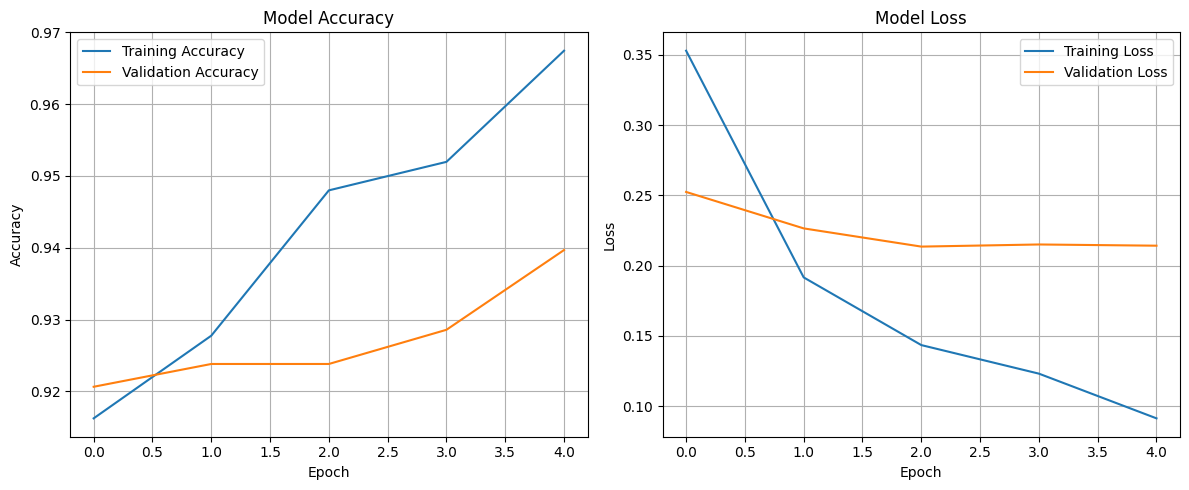

In [17]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Step 7: Evaluate the Model

### 7.1: Make Predictions

Use the predict function to evaluate the model performance using the testing dataset.


In [18]:
# Check if required variables are defined
try:
    if 'model' not in globals():
        raise NameError("Variable 'model' is not defined. Please run the model design and training cells first.")
    if 'X_test' not in globals():
        raise NameError("Variable 'X_test' is not defined. Please run the data splitting cell first.")
    if 'y_test' not in globals():
        raise NameError("Variable 'y_test' is not defined. Please run the data splitting cell first.")
    
    # Make predictions on test set
    y_pred_proba = model.predict(X_test, verbose=0)
    
    # Use argmax to transform predicted labels and test labels
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    
    print("✅ Predictions completed!")
    print(f"Predicted labels shape: {y_pred.shape}")
    print(f"Test labels shape: {y_test_labels.shape}")
    print(f"\nSample predictions (first 10):")
    print(f"Predicted: {y_pred[:10]}")
    print(f"Actual:    {y_test_labels[:10]}")
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure the model has been trained.")


✅ Predictions completed!
Predicted labels shape: (630,)
Test labels shape: (630,)

Sample predictions (first 10):
Predicted: [1 1 1 1 0 1 1 1 1 0]
Actual:    [1 1 1 1 1 1 1 1 1 0]


### 7.2: Classification Report

Use classification_report from sklearn.metrics to evaluate model performance.


In [19]:
# Generate classification report
target_names = ['Negative (0)', 'Positive (1)']
report = classification_report(
    y_test_labels, 
    y_pred, 
    target_names=target_names,
    digits=4
)

print("Classification Report:")
print("=" * 60)
print(report)
print("=" * 60)


Classification Report:
              precision    recall  f1-score   support

Negative (0)     0.6757    0.4902    0.5682        51
Positive (1)     0.9562    0.9793    0.9676       579

    accuracy                         0.9397       630
   macro avg     0.8159    0.7347    0.7679       630
weighted avg     0.9334    0.9397    0.9352       630



## Step 8: Client Program

Design a client program where the user can prompt a review for a particular product. The program will:
1. Clean the review from stop words (using the implemented function)
2. Convert the review into a vector
3. Use the trained model to predict the sentiment
4. Print the predicted sentiment


In [20]:
# Check if required functions and variables are defined
try:
    if 'remove_stopwords' not in globals():
        raise NameError("Function 'remove_stopwords' is not defined. Please run the data cleaning cell first.")
    if 'tokenizer' not in globals():
        raise NameError("Variable 'tokenizer' is not defined. Please run the tokenization cell first.")
    if 'label_encoder' not in globals():
        raise NameError("Variable 'label_encoder' is not defined. Please run the label encoding cell first.")
    if 'max_length' not in globals():
        raise NameError("Variable 'max_length' is not defined. Please run the tokenization cell first.")
    
    def predict_sentiment(review_text, model, tokenizer, label_encoder, max_length=120):
        """
        Predict sentiment for a given review text.
        
        Parameters:
        - review_text: str, the review text to analyze
        - model: trained LSTM model
        - tokenizer: fitted tokenizer
        - label_encoder: fitted label encoder
        - max_length: int, maximum sequence length
        
        Returns:
        - predicted_sentiment: str, 'Positive' or 'Negative'
        - confidence: float, confidence score
        """
        # Step 1: Clean the review from stop words (using the implemented function)
        cleaned_review = remove_stopwords(review_text)
        
        # Step 2: Convert review into vector
        review_sequence = tokenizer.texts_to_sequences([cleaned_review])
        review_padded = pad_sequences(review_sequence, maxlen=max_length, padding='post', truncating='post')
        
        # Step 3: Use the trained model to predict the client's review sentiment
        prediction_proba = model.predict(review_padded, verbose=0)
        prediction = np.argmax(prediction_proba, axis=1)[0]
        confidence = prediction_proba[0][prediction]
        
        # Map prediction to sentiment label
        sentiment_label = label_encoder.inverse_transform([prediction])[0]
        sentiment_text = 'Positive' if sentiment_label == 1 else 'Negative'
        
        return sentiment_text, confidence
    
    print("✅ Client program function created successfully!")
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Check that all required functions and variables are defined.")


✅ Client program function created successfully!


### 8.1: Interactive Client Program

**Run this cell to start the interactive client program.**

The client program will:
1. **Prompt the user** for a product review
2. **Clean the review** from stop words using the `remove_stopwords()` function
3. **Convert the review into a vector** using the tokenizer
4. **Use the trained model** to predict the sentiment
5. **Print the predicted sentiment** and confidence score

Type 'quit' to exit the program.


In [21]:
# ============================================================================
# CLIENT PROGRAM: Sentiment Analysis
# ============================================================================
# This program demonstrates sentiment analysis for product reviews.
# Steps:
# 1. User prompts a review for a particular product
# 2. Clean the review from stop words (using the implemented function)
# 3. Convert the review into a vector
# 4. Use the trained model to predict the sentiment
# 5. Print the predicted sentiment

try:
    # Check if required variables are defined
    if 'predict_sentiment' not in globals():
        raise NameError("Function 'predict_sentiment' is not defined. Please run the previous cell first.")
    if 'model' not in globals():
        raise NameError("Variable 'model' is not defined. Please run the model training cells first.")
    if 'tokenizer' not in globals():
        raise NameError("Variable 'tokenizer' is not defined. Please run the tokenization cell first.")
    if 'label_encoder' not in globals():
        raise NameError("Variable 'label_encoder' is not defined. Please run the label encoding cell first.")
    if 'max_length' not in globals():
        raise NameError("Variable 'max_length' is not defined. Please run the tokenization cell first.")
    if 'remove_stopwords' not in globals():
        raise NameError("Function 'remove_stopwords' is not defined. Please run the data cleaning cell first.")
    
    print("=" * 70)
    print("SENTIMENT ANALYSIS CLIENT PROGRAM")
    print("=" * 70)
    print("\nThis program analyzes the sentiment of product reviews.")
    print("=" * 70)
    
    # Example reviews to demonstrate the client program functionality
    example_reviews = [
        "I love this product! It works perfectly and exceeded my expectations.",
        "This is the worst purchase I've ever made. Terrible quality and poor customer service.",
        "The product is okay, nothing special but it does the job.",
        "Amazing quality! Highly recommend to everyone. Worth every penny!",
        "Not satisfied with the product. It broke after just one week of use."
    ]
    
    print("\n📝 DEMONSTRATION: Processing example reviews...")
    print("=" * 70)
    
    # Process each example review
    for i, user_review in enumerate(example_reviews, 1):
        print(f"\n{'='*70}")
        print(f"EXAMPLE {i}")
        print("=" * 70)
        
        # Step 1: User prompts a review for a particular product
        print(f"Step 1 - User Review: {user_review}")
        
        # Step 2: Clean the review from stop words (using the implemented function)
        cleaned_review = remove_stopwords(user_review)
        print(f"Step 2 - Cleaned Review (stop words removed): {cleaned_review}")
        
        # Step 3: Convert the review into a vector (done inside predict_sentiment)
        # Step 4: Use the trained model to predict the sentiment
        # Step 5: Print the predicted sentiment
        sentiment, confidence = predict_sentiment(user_review, model, tokenizer, label_encoder, max_length)
        
        print(f"Step 3 - Review converted to vector (using tokenizer)")
        print(f"Step 4 - Model prediction completed")
        print(f"Step 5 - Predicted Sentiment: {sentiment}")
        print(f"         Confidence: {confidence:.4f} ({confidence*100:.2f}%)")
        print("=" * 70)
    
    print("\n" + "=" * 70)
    print("INTERACTIVE MODE")
    print("=" * 70)
    print("\nTo use interactive mode, uncomment the code below and run this cell again.")
    print("Or run the next cell (8.2) for interactive input.\n")
    print("=" * 70)
    
    # Optional: Uncomment below for interactive input
    """
    print("\n🔄 Starting interactive mode...")
    print("Type 'quit' to exit.\n")
    
    while True:
        # Step 1: User must prompt a review for a particular product
        user_review = input("Enter a product review (or 'quit' to exit): ")
        
        # Check for exit command
        if user_review.lower() == 'quit':
            print("\nThank you for using the Sentiment Analysis Client Program!")
            break
        
        # Validate input
        if user_review.strip() == '':
            print("⚠️  Please enter a valid review. Empty reviews are not allowed.")
            continue
        
        # Process the review
        print("\n" + "=" * 70)
        print("PROCESSING REVIEW...")
        print("=" * 70)
        print(f"Original Review: {user_review}")
        
        # Step 2: Clean the review from stop words (using the implemented function)
        cleaned_review = remove_stopwords(user_review)
        print(f"Cleaned Review: {cleaned_review}")
        
        # Step 3: Convert the review into a vector (done inside predict_sentiment)
        # Step 4: Use the trained model to predict the sentiment
        # Step 5: Print the predicted sentiment
        sentiment, confidence = predict_sentiment(user_review, model, tokenizer, label_encoder, max_length)
        
        print("\n" + "=" * 70)
        print("PREDICTION RESULT")
        print("=" * 70)
        print(f"Predicted Sentiment: {sentiment}")
        print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")
        print("=" * 70)
    """
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
    print("   Required cells:")
    print("   - Data cleaning (remove_stopwords function)")
    print("   - Tokenization (tokenizer, max_length)")
    print("   - Label encoding (label_encoder)")
    print("   - Model training (model)")
    print("   - Client function definition (predict_sentiment)")
except KeyboardInterrupt:
    print("\n\nProgram interrupted by user.")
    print("Thank you for using the Sentiment Analysis Client Program!")
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure the model has been trained and all required variables are defined.")
    import traceback
    traceback.print_exc()


SENTIMENT ANALYSIS CLIENT PROGRAM

This program analyzes the sentiment of product reviews.

📝 DEMONSTRATION: Processing example reviews...

EXAMPLE 1
Step 1 - User Review: I love this product! It works perfectly and exceeded my expectations.
Step 2 - Cleaned Review (stop words removed): love product works perfectly exceeded expectations
Step 3 - Review converted to vector (using tokenizer)
Step 4 - Model prediction completed
Step 5 - Predicted Sentiment: Positive
         Confidence: 0.9993 (99.93%)

EXAMPLE 2
Step 1 - User Review: This is the worst purchase I've ever made. Terrible quality and poor customer service.
Step 2 - Cleaned Review (stop words removed): worst purchase ive ever made terrible quality poor customer service
Step 3 - Review converted to vector (using tokenizer)
Step 4 - Model prediction completed
Step 5 - Predicted Sentiment: Negative
         Confidence: 0.6866 (68.66%)

EXAMPLE 3
Step 1 - User Review: The product is okay, nothing special but it does the job.
Step

### 8.3: Save Model and Tokenizer for Terminal Use

**Run this cell to save the trained model and tokenizer to disk.**

This allows you to use the `interactive_client.py` script from the terminal without needing to run the notebook.


In [ ]:
# ============================================================================
# SAVE MODEL AND TOKENIZER FOR TERMINAL USE
# ============================================================================
# This cell saves the trained model and tokenizer so you can use
# interactive_client.py from the terminal without running the notebook.

try:
    # Check if required variables are defined
    if 'model' not in globals():
        raise NameError("Variable 'model' is not defined. Please run the model training cells first.")
    if 'tokenizer' not in globals():
        raise NameError("Variable 'tokenizer' is not defined. Please run the tokenization cell first.")
    if 'label_encoder' not in globals():
        raise NameError("Variable 'label_encoder' is not defined. Please run the label encoding cell first.")
    
    import pickle
    import os
    
    print("=" * 70)
    print("SAVING MODEL AND TOKENIZER")
    print("=" * 70)
    
    # Save the model
    model_path = 'sentiment_model.h5'
    print(f"\n💾 Saving model to {model_path}...")
    model.save(model_path)
    print("✅ Model saved successfully!")
    
    # Save the tokenizer
    tokenizer_path = 'tokenizer.pkl'
    print(f"\n💾 Saving tokenizer to {tokenizer_path}...")
    with open(tokenizer_path, 'wb') as f:
        pickle.dump(tokenizer, f)
    print("✅ Tokenizer saved successfully!")
    
    # Save the label encoder
    label_encoder_path = 'label_encoder.pkl'
    print(f"\n💾 Saving label encoder to {label_encoder_path}...")
    with open(label_encoder_path, 'wb') as f:
        pickle.dump(label_encoder, f)
    print("✅ Label encoder saved successfully!")
    
    print("\n" + "=" * 70)
    print("✅ ALL FILES SAVED SUCCESSFULLY!")
    print("=" * 70)
    print("\n📝 You can now run the interactive client from terminal:")
    print("   python interactive_client.py")
    print("\n" + "=" * 70)
    
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run all previous cells in order!")
    print("   Required cells:")
    print("   - Model training (model)")
    print("   - Tokenization (tokenizer)")
    print("   - Label encoding (label_encoder)")
except Exception as e:
    print(f"❌ ERROR: {e}")
    import traceback
    traceback.print_exc()


### 8.2: Interactive Client Program

**Two options available depending on your environment:**

---

#### **OPTION 1: For Jupyter Notebook / JupyterLab / Google Colab** ✅

**Run this cell** - it will show an input box where you can type your review interactively.

📝 **How to use:**
1. Run this cell
2. An input box will appear in the output area
3. Type your review and press Enter
4. See if it's **POSITIVE** ✅ or **NEGATIVE** ❌
5. Type 'quit' to exit

---

#### **OPTION 2: For VS Code Users** ⚠️

**VS Code notebooks do NOT support interactive `input()` in cells.**

✅ **SOLUTION: Use the Terminal version!**

📝 **How to use:**
1. **Open VS Code Terminal** (Ctrl+` or View → Terminal)
2. Make sure you're in the project directory: `cd C:\Users\New User\Desktop\HW-5`
3. **Run:** `python interactive_client.py`
4. The `input()` prompts will work perfectly in Terminal!
5. Type your reviews and see results

**OR** use this cell with a variable:
- Edit the `user_review` variable in the cell
- Run the cell to see results

---

**What the program does:**
- Takes your review as input
- Cleans it (removes stop words)
- Converts it to a vector
- Uses the trained model to predict sentiment
- Tells you if it's **POSITIVE** ✅ or **NEGATIVE** ❌

The program implements all required functionality:

✅ **Step 1:** User prompts a review for a particular product  
✅ **Step 2:** Clean the review from stop words (using `remove_stopwords()` function)  
✅ **Step 3:** Convert the review into a vector (using tokenizer and pad_sequences)  
✅ **Step 4:** Use the trained model to predict the sentiment  
✅ **Step 5:** Print the predicted sentiment (Positive or Negative) with confidence score


In [ ]:
# ============================================================================
# INTERACTIVE CLIENT PROGRAM
# ============================================================================
# This program will prompt you to enter a review and determine if it's positive or negative.
# 
# ⚠️ IMPORTANT: This cell works in Jupyter Notebook, JupyterLab, and Google Colab.
#    For VS Code users: Use the interactive_client.py file in Terminal instead!

import sys

# Detect if we're in VS Code
is_vscode = 'VS Code' in str(sys.executable) or 'vscode' in str(sys.executable).lower()

try:
    # Check if required variables are defined
    if 'predict_sentiment' not in globals():
        raise NameError("Function 'predict_sentiment' is not defined. Please run Cell 8.1 first.")
    if 'model' not in globals():
        raise NameError("Variable 'model' is not defined. Please run the model training cells first.")
    if 'tokenizer' not in globals():
        raise NameError("Variable 'tokenizer' is not defined. Please run the tokenization cell first.")
    if 'label_encoder' not in globals():
        raise NameError("Variable 'label_encoder' is not defined. Please run the label encoding cell first.")
    if 'max_length' not in globals():
        raise NameError("Variable 'max_length' is not defined. Please run the tokenization cell first.")
    if 'remove_stopwords' not in globals():
        raise NameError("Function 'remove_stopwords' is not defined. Please run the data cleaning cell first.")
    
    print("=" * 70)
    print("INTERACTIVE SENTIMENT ANALYSIS CLIENT PROGRAM")
    print("=" * 70)
    
    # Check if we're in VS Code
    if is_vscode:
        print("\n⚠️  DETECTED: VS Code Environment")
        print("=" * 70)
        print("\nVS Code notebooks do NOT support interactive input() in cells.")
        print("\n✅ SOLUTION: Use the Terminal version instead!")
        print("\n📝 INSTRUCTIONS:")
        print("   1. Open VS Code Terminal (Ctrl+` or View → Terminal)")
        print("   2. Make sure you're in the project directory")
        print("   3. Run: python interactive_client.py")
        print("   4. The input() prompts will work perfectly in Terminal!")
        print("\n" + "=" * 70)
        print("\nAlternatively, you can use this cell with a variable:")
        print("   Edit the 'user_review' variable below and run the cell.")
        print("=" * 70)
        
        # Provide alternative for VS Code users
        user_review = "I love this product! It works perfectly."  # Edit this line
        
        print(f"\n📝 Using review: {user_review}")
        print("   (Edit the 'user_review' variable above to change it)")
        print("\n" + "=" * 70)
    else:
        print("\n✅ Jupyter Environment Detected")
        print("This cell supports interactive input() - you can type your review when prompted.")
        print("\n" + "=" * 70)
        print("\nThis program will analyze your review and determine if it's POSITIVE or NEGATIVE.")
        print("\n" + "=" * 70)
    
    # Main client program loop
    if is_vscode:
        # For VS Code: Process the variable-based review
        reviews_to_process = [user_review]
    else:
        # For Jupyter: Use interactive input
        reviews_to_process = []
        while True:
            print("\n" + "─" * 70)
            print("📍 ENTER YOUR REVIEW BELOW:")
            print("   (Look for input box in the output area below)")
            print("─" * 70)
            user_review = input("\n👉 Enter a product review (or 'quit' to exit): ")
            
            if user_review.lower() == 'quit':
                print("\n" + "=" * 70)
                print("Thank you for using the Sentiment Analysis Client Program!")
                print("=" * 70)
                break
            
            if user_review.strip() == '':
                print("⚠️  Please enter a valid review. Empty reviews are not allowed.")
                continue
            
            reviews_to_process.append(user_review)
    
    # Process each review
    for user_review in reviews_to_process:
        # Process the review
        print("\n" + "=" * 70)
        print("PROCESSING REVIEW...")
        print("=" * 70)
        
        # Step 1: User prompts a review for a particular product
        print(f"Step 1 - User Review: {user_review}")
        
        # Step 2: Clean the review from stop words (using the implemented function)
        cleaned_review = remove_stopwords(user_review)
        print(f"Step 2 - Cleaned Review (stop words removed): {cleaned_review}")
        
        # Step 3: Convert the review into a vector (done inside predict_sentiment)
        # Step 4: Use the trained model to predict the sentiment
        # Step 5: Print the predicted sentiment
        sentiment, confidence = predict_sentiment(user_review, model, tokenizer, label_encoder, max_length)
        
        print(f"Step 3 - Review converted to vector (using tokenizer)")
        print(f"Step 4 - Model prediction completed")
        print(f"Step 5 - Predicted Sentiment: {sentiment}")
        print(f"         Confidence: {confidence:.4f} ({confidence*100:.2f}%)")
        print("=" * 70)
        
        # Clear summary
        print("\n" + "=" * 70)
        if sentiment == "Positive":
            print("✅ RESULT: This is a POSITIVE review!")
        else:
            print("❌ RESULT: This is a NEGATIVE review!")
        print("=" * 70)
        
        if is_vscode:
            print("\n💡 TIP: To analyze another review, edit the 'user_review' variable")
            print("   at the top of this cell and run it again.")
            print("   Or use: python interactive_client.py in Terminal for true interactivity!")
        
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure to run Cell 8.1 first!")
except KeyboardInterrupt:
    print("\n\n" + "=" * 70)
    print("Program interrupted by user.")
    print("Thank you for using the Sentiment Analysis Client Program!")
    print("=" * 70)
except Exception as e:
    print(f"❌ ERROR: {e}")
    print("⚠️  Make sure the model has been trained and all required variables are defined.")
    import traceback
    traceback.print_exc()


INTERACTIVE SENTIMENT ANALYSIS CLIENT PROGRAM

This program will analyze your review and determine if it's POSITIVE or NEGATIVE.


──────────────────────────────────────────────────────────────────────
📍 ENTER YOUR REVIEW BELOW:
   (In VS Code: Look for input box in output area or terminal)
──────────────────────────────────────────────────────────────────────
